In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Загружаем данные

In [2]:
data = pd.read_csv("6 class csv.csv")
data

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [3]:
data.isnull().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

# отсутствующих значений нет

In [4]:
 data.dtypes

Temperature (K)             int64
Luminosity(L/Lo)          float64
Radius(R/Ro)              float64
Absolute magnitude(Mv)    float64
Star type                   int64
Star color                 object
Spectral Class             object
dtype: object

# В данном наборе данных есть нечисловой признак. Попробуем обучить данные без учета этого признака

# Стандартизируем данные и разделяем их: 70% - обучающая выборка, 30% - тестовая

<AxesSubplot:xlabel='Spectral Class', ylabel='count'>

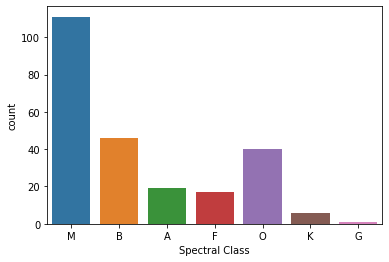

In [5]:
X = data.drop(['Spectral Class','Star color'], axis=1)
y = data['Spectral Class']
scaler = preprocessing.StandardScaler()
scaler = scaler.fit(X)
X_scaled = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
sns.countplot(x=data['Spectral Class'])

# Классифицировать будем с помощью BaggingClassifier

In [6]:
bagging = BaggingClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=50, random_state=50, n_jobs=-1)
bagging.fit(X_train, y_train)
bag_pred = bagging.predict(X_test)
bag_cf_matrix = confusion_matrix(y_test, bag_pred)
bag_cls_rep = classification_report(y_test, bag_pred,zero_division=1)
print(bag_cf_matrix)
print(bag_cls_rep)

[[ 4  2  0  0  0  0  2]
 [ 0 12  0  1  0  0  0]
 [ 0  0  2  0  1  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  0]
 [ 0  0  0  0  0 35  0]
 [ 0  2  0  0  0  0  9]]
              precision    recall  f1-score   support

           A       1.00      0.50      0.67         8
           B       0.75      0.92      0.83        13
           F       1.00      0.67      0.80         3
           G       0.00      1.00      0.00         0
           K       0.50      0.50      0.50         2
           M       0.97      1.00      0.99        35
           O       0.82      0.82      0.82        11

    accuracy                           0.88        72
   macro avg       0.72      0.77      0.66        72
weighted avg       0.90      0.88      0.87        72



# Найдем оптимальные гиперпараметры

In [7]:
num_est = np.arange(50,150)
parameters = {
                'n_estimators':num_est
             }
bag_grid = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), random_state=50)

grid = GridSearchCV(estimator=bag_grid, param_grid=parameters)
grid.fit(X_train, y_train)
result = grid.cv_results_['mean_test_score']
print(grid.best_estimator_)

C:\Users\Xenia\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=81, random_state=50)


# Классифицируем данные с оптимальными параметрами

In [8]:
bagging = BaggingClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=81, random_state=50, n_jobs=-1)
bagging.fit(X_train, y_train)
bag_pred = bagging.predict(X_test)
bag_cf_matrix = confusion_matrix(y_test, bag_pred)
bag_cls_rep = classification_report(y_test, bag_pred,zero_division=1)
print(bag_cf_matrix)
print(bag_cls_rep)

[[ 5  1  0  0  0  0  2]
 [ 0 12  0  1  0  0  0]
 [ 0  0  2  0  1  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  0]
 [ 0  0  0  0  0 35  0]
 [ 0  2  0  0  0  0  9]]
              precision    recall  f1-score   support

           A       1.00      0.62      0.77         8
           B       0.80      0.92      0.86        13
           F       1.00      0.67      0.80         3
           G       0.00      1.00      0.00         0
           K       0.50      0.50      0.50         2
           M       0.97      1.00      0.99        35
           O       0.82      0.82      0.82        11

    accuracy                           0.89        72
   macro avg       0.73      0.79      0.68        72
weighted avg       0.91      0.89      0.89        72



# результат классификации достаточно хороший, попробуем еще повысить качество классификации

# преобразуем категориальные признаки в числовые

In [9]:
data

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [10]:
color_count = data['Star color'].value_counts()
class_count = data['Spectral Class'].value_counts()

data['Star_color_count_enc'] = data['Star color'].map(color_count)
data['Spectral_Class_count_enc'] = data['Spectral Class'].map(class_count)
data

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class,Star_color_count_enc,Spectral_Class_count_enc
0,3068,0.002400,0.1700,16.12,0,Red,M,112,111
1,3042,0.000500,0.1542,16.60,0,Red,M,112,111
2,2600,0.000300,0.1020,18.70,0,Red,M,112,111
3,2800,0.000200,0.1600,16.65,0,Red,M,112,111
4,1939,0.000138,0.1030,20.06,0,Red,M,112,111
...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O,55,40
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O,55,40
237,8829,537493.000000,1423.0000,-10.73,5,White,A,7,19
238,9235,404940.000000,1112.0000,-11.23,5,White,A,7,19


<AxesSubplot:xlabel='Spectral_Class_count_enc', ylabel='count'>

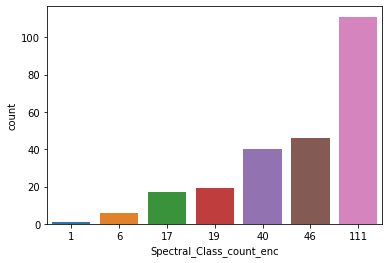

In [11]:
X1 = data.drop(['Spectral Class','Star color','Spectral_Class_count_enc'], axis=1)
y1 = data['Spectral_Class_count_enc']
scaler1 = preprocessing.StandardScaler()
scaler1 = scaler1.fit(X1)
X_scaled1 = scaler1.transform(X1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3)
sns.countplot(x=data['Spectral_Class_count_enc'])

In [12]:
bagging = BaggingClassifier(DecisionTreeClassifier(max_depth=8), n_estimators=50, random_state=50, n_jobs=-1)
bagging.fit(X_train1, y_train1)
bag_pred = bagging.predict(X_test1)
bag_cf_matrix = confusion_matrix(y_test1, bag_pred)
bag_cls_rep = classification_report(y_test1, bag_pred,zero_division=1)
print(bag_cf_matrix)
print(bag_cls_rep)

[[ 1  0  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  0  5  0  1  0]
 [ 0  0  0  9  1  0]
 [ 0  0  0  0 15  0]
 [ 0  0  0  0  0 36]]
              precision    recall  f1-score   support

           6       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         4
          19       1.00      0.83      0.91         6
          40       1.00      0.90      0.95        10
          46       0.88      1.00      0.94        15
         111       1.00      1.00      1.00        36

    accuracy                           0.97        72
   macro avg       0.98      0.96      0.97        72
weighted avg       0.98      0.97      0.97        72



In [13]:
num_est = np.arange(50,150)
parameters = {
                'n_estimators':num_est
             }
bag_grid = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5))

grid = GridSearchCV(estimator=bag_grid, param_grid=parameters)
grid.fit(X_train1, y_train1)
result = grid.cv_results_['mean_test_score']
print(grid.best_estimator_)

C:\Users\Xenia\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=52)


In [29]:
bagging = BaggingClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=52, random_state=50, n_jobs=-1)
bagging.fit(X_train1, y_train1)
bag_pred = bagging.predict(X_test1)
bag_cf_matrix = confusion_matrix(y_test1, bag_pred)
bag_cls_rep = classification_report(y_test1, bag_pred,zero_division=1)
print(bag_cf_matrix)
print(bag_cls_rep)

[[ 1  0  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  1  0 14  0]
 [ 0  0  0  0  0 36]]
              precision    recall  f1-score   support

           6       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         4
          19       0.86      1.00      0.92         6
          40       1.00      1.00      1.00        10
          46       1.00      0.93      0.97        15
         111       1.00      1.00      1.00        36

    accuracy                           0.99        72
   macro avg       0.98      0.99      0.98        72
weighted avg       0.99      0.99      0.99        72



# Не смотря на то, что был преобразован лишь один призак, качество классификации повысилось значительно

# Для сравнения применим CountEncoder к категориальным признакам

In [15]:
data1 = pd.read_csv("6 class csv.csv")
data1

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [21]:
import category_encoders as ce
from sklearn.ensemble import ExtraTreesClassifier

X2 = data1.drop(['Spectral Class'], axis=1)
y2 = data1['Spectral Class']

encoder = ce.CountEncoder(cols=['Star color'])
X2 = encoder.fit_transform(X2)

model = ExtraTreesClassifier()
model.fit(X2, y2.values.ravel())

importances = pd.Series(model.feature_importances_, index=X.columns)

# Произведем классификацию на преобразованных данных

In [24]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=50)

In [25]:
bagging = BaggingClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=50, random_state=50, n_jobs=-1)
bagging.fit(X_train2, y_train2)
bag_pred = bagging.predict(X_test2)
bag_cf_matrix = confusion_matrix(y_test2, bag_pred)
bag_cls_rep = classification_report(y_test2, bag_pred,zero_division=1)
print(bag_cf_matrix)
print(bag_cls_rep)

[[ 5  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  1]
 [ 1  0  5  0  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0 35  0]
 [ 0  1  0  0  0  0 11]]
              precision    recall  f1-score   support

           A       0.83      1.00      0.91         5
           B       0.92      0.92      0.92        12
           F       1.00      0.83      0.91         6
           G       1.00      0.00      0.00         1
           K       1.00      1.00      1.00         1
           M       1.00      1.00      1.00        35
           O       0.85      0.92      0.88        12

    accuracy                           0.94        72
   macro avg       0.94      0.81      0.80        72
weighted avg       0.95      0.94      0.94        72



# Полученные результаты выше начальных результатов и немного ниже результатов, полученных после преобразования вручную. Такие результаты можно объяснить достаточно простым набором данных. Если бы категориальных признаков было бы больше, оптимальнее было бы использовать CountEncoder

# Попробуем оптимизировать параметры для получения наиболее высоких метрик

In [26]:
num_est = np.arange(50,150)
parameters = {
                'n_estimators':num_est
             }
bag_grid = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), random_state=50)

grid = GridSearchCV(estimator=bag_grid, param_grid=parameters)
grid.fit(X_train, y_train)
result = grid.cv_results_['mean_test_score']
print(grid.best_estimator_)

C:\Users\Xenia\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=50, random_state=50)


In [28]:
bagging = BaggingClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=50, random_state=50, n_jobs=-1)
bagging.fit(X_train2, y_train2)
bag_pred = bagging.predict(X_test2)
bag_cf_matrix = confusion_matrix(y_test2, bag_pred)
bag_cls_rep = classification_report(y_test2, bag_pred,zero_division=1)
print(bag_cf_matrix)
print(bag_cls_rep)

[[ 5  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  1]
 [ 1  0  5  0  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0 35  0]
 [ 0  1  0  0  0  0 11]]
              precision    recall  f1-score   support

           A       0.83      1.00      0.91         5
           B       0.92      0.92      0.92        12
           F       1.00      0.83      0.91         6
           G       1.00      0.00      0.00         1
           K       1.00      1.00      1.00         1
           M       1.00      1.00      1.00        35
           O       0.85      0.92      0.88        12

    accuracy                           0.94        72
   macro avg       0.94      0.81      0.80        72
weighted avg       0.95      0.94      0.94        72



# Таким образом даже один нечисловой параметр значительно влияет на качество классификации. Оптимально преобразованные данные позволяют достичь максимально корректной классификации.